# SI 330: Data Manipulation 
## 10 - More Natural Language Processing

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Why learn NLP?
- Natural language = human language
- We use language to learn about the world
- How machines understand human langauge?
- How can we quantify the meaning of language?

## Applications?
- Probabily any service that uses text as information
- Search engine, SNS
    - What's the document about?
    - How do you determine the similarity?
- Virtual assistants: Alexa, Google Assistant, Cortana, etc. 
    - Understand the semantic information from your speech from parsed text
- Biology, genetics
    - Genetic information / DNA sequence as text
    - Draw networks of proteins/molecules from vast amount of scientific papers 

# Outline for today
- ```spaCy```
    - Cleaning the data
    - Extracting linguistic features
- ```Word2Vec``` (if we have time)
    - Vector representation of words
    - Word similarities
    - Vector algebra for semantics

In [21]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# spaCy?

- Fast, and extensible NLP package for Python
- <https://spacy.io/>

In [4]:
!conda install -y spacy

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.4                |           py37_0         874 KB  conda-forge
    cymem-2.0.2                |   py37h04f5b5a_0          30 KB
    dill-0.2.9                 |           py37_0         112 KB  conda-forge
    msgpack-numpy-0.4.3.2      |             py_0           8 KB  conda-forge
    murmurhash-1.0.0           |   py37hfc679d8_0          16 KB  conda-forge
    plac-0.9.6                 |             py_1          18 KB  conda-forge
    preshed-2.0.1              |   py37h0a44026_0          63 KB
    regex-2018.01.10           |py37h1de35cc_1000         324 KB  conda-forge
    spacy-2.0.18               |py37h0a44026_1000        51.1 MB  conda-forge
    thinc-6.12.1               |py37h1702cab_1000         

In [20]:
import spacy

In [7]:
!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 5.6MB/s 
  Running setup.py install for en-core-web-sm ... done

    Linking successful
    /anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [41]:
# loading up the language model: English
nlp = spacy.load('en')

# 0. Data cleaning

In [42]:
some_text = """Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings.  I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, which
braces my nerves and fills me with delight.  Do you understand this
feeling?  This breeze, which has travelled from the regions towards
which I am advancing, gives me a foretaste of those icy climes.
Inspirited by this wind of promise, my daydreams become more fervent
and vivid.  I try in vain to be persuaded that the pole is the seat of
frost and desolation; it ever presents itself to my imagination as the
region of beauty and delight.  There, Margaret, the sun is for ever
visible, its broad disk just skirting the horizon and diffusing a
perpetual splendour.  There—for with your leave, my sister, I will put
some trust in preceding navigators—there snow and frost are banished;
and, sailing over a calm sea, we may be wafted to a land surpassing in
wonders and in beauty every region hitherto discovered on the habitable
globe.  Its productions and features may be without example, as the
phenomena of the heavenly bodies undoubtedly are in those undiscovered
solitudes.  What may not be expected in a country of eternal light?  I
may there discover the wondrous power which attracts the needle and may
regulate a thousand celestial observations that require only this
voyage to render their seeming eccentricities consistent for ever.  I
shall satiate my ardent curiosity with the sight of a part of the world
never before visited, and may tread a land never before imprinted by
the foot of man. These are my enticements, and they are sufficient to
conquer all fear of danger or death and to induce me to commence this
laborious voyage with the joy a child feels when he embarks in a little
boat, with his holiday mates, on an expedition of discovery up his
native river. But supposing all these conjectures to be false, you
cannot contest the inestimable benefit which I shall confer on all
mankind, to the last generation, by discovering a passage near the pole
to those countries, to reach which at present so many months are
requisite; or by ascertaining the secret of the magnet, which, if at
all possible, can only be effected by an undertaking such as mine.

These reflections have dispelled the agitation with which I began my
letter, and I feel my heart glow with an enthusiasm which elevates me
to heaven, for nothing contributes so much to tranquillise the mind as
a steady purpose—a point on which the soul may fix its intellectual
eye.  This expedition has been the favourite dream of my early years. I
have read with ardour the accounts of the various voyages which have
been made in the prospect of arriving at the North Pacific Ocean
through the seas which surround the pole.  You may remember that a
history of all the voyages made for purposes of discovery composed the
whole of our good Uncle Thomas’ library.  My education was neglected,
yet I was passionately fond of reading.  These volumes were my study
day and night, and my familiarity with them increased that regret which
I had felt, as a child, on learning that my father’s dying injunction
had forbidden my uncle to allow me to embark in a seafaring life.

These visions faded when I perused, for the first time, those poets
whose effusions entranced my soul and lifted it to heaven.  I also
became a poet and for one year lived in a paradise of my own creation;
I imagined that I also might obtain a niche in the temple where the
names of Homer and Shakespeare are consecrated.  You are well
acquainted with my failure and how heavily I bore the disappointment.
But just at that time I inherited the fortune of my cousin, and my
thoughts were turned into the channel of their earlier bent.

Six years have passed since I resolved on my present undertaking.  I
can, even now, remember the hour from which I dedicated myself to this
great enterprise.  I commenced by inuring my body to hardship.  I
accompanied the whale-fishers on several expeditions to the North Sea;
I voluntarily endured cold, famine, thirst, and want of sleep; I often
worked harder than the common sailors during the day and devoted my
nights to the study of mathematics, the theory of medicine, and those
branches of physical science from which a naval adventurer might derive
the greatest practical advantage.  Twice I actually hired myself as an
under-mate in a Greenland whaler, and acquitted myself to admiration. I
must own I felt a little proud when my captain offered me the second
dignity in the vessel and entreated me to remain with the greatest
earnestness, so valuable did he consider my services.

And now, dear Margaret, do I not deserve to accomplish some great purpose?
My life might have been passed in ease and luxury, but I preferred glory to
every enticement that wealth placed in my path. Oh, that some encouraging
voice would answer in the affirmative! My courage and my resolution is
firm; but my hopes fluctuate, and my spirits are often depressed. I am
about to proceed on a long and difficult voyage, the emergencies of which
will demand all my fortitude: I am required not only to raise the spirits
of others, but sometimes to sustain my own, when theirs are failing.

This is the most favourable period for travelling in Russia.  They fly
quickly over the snow in their sledges; the motion is pleasant, and, in
my opinion, far more agreeable than that of an English stagecoach.  The
cold is not excessive, if you are wrapped in furs—a dress which I have
already adopted, for there is a great difference between walking the
deck and remaining seated motionless for hours, when no exercise
prevents the blood from actually freezing in your veins.  I have no
ambition to lose my life on the post-road between St. Petersburgh and
Archangel.

I shall depart for the latter town in a fortnight or three weeks; and my
intention is to hire a ship there, which can easily be done by paying the
insurance for the owner, and to engage as many sailors as I think necessary
among those who are accustomed to the whale-fishing. I do not intend to
sail until the month of June; and when shall I return? Ah, dear sister, how
can I answer this question? If I succeed, many, many months, perhaps years,
will pass before you and I may meet. If I fail, you will see me again soon,
or never.

Farewell, my dear, excellent Margaret. Heaven shower down blessings on you,
and save me, that I may again and again testify my gratitude for all your
love and kindness.

Your affectionate brother,

R. Walton"""

### Section goal: calculate the frequency of each word
- See which words are more frequent.
- Generate more meaningful summary for the above paragraph.

## 0-1. lowering the case

In [43]:
type(some_text)

str

In [44]:
some_text

'Letter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings.  I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, which\nbraces my nerves and fills me with delight.  Do you understand this\nfeeling?  This breeze, which has travelled from the regions towards\nwhich I am advancing, gives me a foretaste of those icy climes.\nInspirited by this wind of promise, my daydreams become more fervent\nand vivid.  I try in vain to be persuaded that the pole is the seat of\nfrost and desolation; it ever presents itself to my imagination as the\nregion of beauty and delight.  There, Margaret, the sun is for 

In [45]:
some_text_lower = some_text.lower()

In [46]:
some_text_lower

'letter 1\n\n_to mrs. saville, england._\n\n\nst. petersburgh, dec. 11th, 17—.\n\n\nyou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings.  i arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\ni am already far north of london, and as i walk in the streets of\npetersburgh, i feel a cold northern breeze play upon my cheeks, which\nbraces my nerves and fills me with delight.  do you understand this\nfeeling?  this breeze, which has travelled from the regions towards\nwhich i am advancing, gives me a foretaste of those icy climes.\ninspirited by this wind of promise, my daydreams become more fervent\nand vivid.  i try in vain to be persuaded that the pole is the seat of\nfrost and desolation; it ever presents itself to my imagination as the\nregion of beauty and delight.  there, margaret, the sun is for 

## 0-2. remove punctuations and special characters

#### Alternatively, we can use regular expression to remove punctuations
- So we don't have to list up all possible special characters that we want to remove
- https://docs.python.org/3.4/library/re.html
- https://en.wikipedia.org/wiki/Regular_expression

### <font color="magenta">Q1: Write a regular expression (regex) that will remove all punctuation from the above passage</font>

In [47]:
import re
some_text_lower_no_punct = re.sub(r'([^\w\s])|_+', ' ', some_text_lower)

In [48]:
print(some_text_lower_no_punct)

letter 1

 to mrs  saville  england  


st  petersburgh  dec  11th  17  


you will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings   i arrived here yesterday  and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking 

i am already far north of london  and as i walk in the streets of
petersburgh  i feel a cold northern breeze play upon my cheeks  which
braces my nerves and fills me with delight   do you understand this
feeling   this breeze  which has travelled from the regions towards
which i am advancing  gives me a foretaste of those icy climes 
inspirited by this wind of promise  my daydreams become more fervent
and vivid   i try in vain to be persuaded that the pole is the seat of
frost and desolation  it ever presents itself to my imagination as the
region of beauty and delight   there  margaret  the sun is for ever
visible  its broad

- However, special character ```\n``` (linebreak) still exists in both cases. Let's remove these additionally.

In [49]:
import os
os.linesep

'\n'

In [50]:
some_clean_text = some_text_lower_no_punct.replace(os.linesep, " ")
print(some_clean_text)

letter 1   to mrs  saville  england     st  petersburgh  dec  11th  17     you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings   i arrived here yesterday  and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking   i am already far north of london  and as i walk in the streets of petersburgh  i feel a cold northern breeze play upon my cheeks  which braces my nerves and fills me with delight   do you understand this feeling   this breeze  which has travelled from the regions towards which i am advancing  gives me a foretaste of those icy climes  inspirited by this wind of promise  my daydreams become more fervent and vivid   i try in vain to be persuaded that the pole is the seat of frost and desolation  it ever presents itself to my imagination as the region of beauty and delight   there  margaret  the sun is for ever visible  its broad

### <font color='magenta'> Q2. How would you remove numbers from the text? </font>

In [51]:
# put your code here

In [52]:
re.sub(r'[0-9]', ' ', some_clean_text)

'letter     to mrs  saville  england     st  petersburgh  dec    th         you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings   i arrived here yesterday  and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking   i am already far north of london  and as i walk in the streets of petersburgh  i feel a cold northern breeze play upon my cheeks  which braces my nerves and fills me with delight   do you understand this feeling   this breeze  which has travelled from the regions towards which i am advancing  gives me a foretaste of those icy climes  inspirited by this wind of promise  my daydreams become more fervent and vivid   i try in vain to be persuaded that the pole is the seat of frost and desolation  it ever presents itself to my imagination as the region of beauty and delight   there  margaret  the sun is for ever visible  its broa

## 0-3. Remove stop words

- Stop words usually refers to the most common words in a language
    - No single universial stopwords
    - Often stopwords are removed to improve the performance of NLP models
    - https://en.wikipedia.org/wiki/Stop_words
    - https://en.wikipedia.org/wiki/Most_common_words_in_English

#### Import the list of stop words from ```spaCy```

In [53]:
from spacy.lang.en.stop_words import STOP_WORDS

In [54]:
np.array(STOP_WORDS)

array({'meanwhile', 'beyond', 'another', 'are', 'sometimes', 'nevertheless', 'seeming', 'up', 'has', 'is', 'due', 'until', 'which', 'would', 'nor', 'fifteen', 'her', 'on', 'himself', 'will', 'whereafter', 'using', 'yourself', 'forty', 'herein', 'those', 'eleven', 'more', 'otherwise', 'since', 'indeed', 'i', 'well', 'ten', 'nowhere', 'be', 'together', 're', 'latter', 'front', 'our', 'top', 'us', 'somehow', 'perhaps', 'whom', 'themselves', 'who', 'yourselves', 'side', 'hereby', 'becoming', 'formerly', 'make', 'down', 'please', 'say', 'them', 'six', 'what', 'whole', 'always', 'doing', 'few', 'get', 'became', 'next', 'beforehand', 'hence', 'being', 'bottom', 'been', 'ca', 'see', 'fifty', 'even', 'show', 'whenever', 'for', 'these', 'move', 'all', 'off', 'sometime', 'somewhere', 'beside', 'my', 'besides', 'else', 'how', 'could', 'itself', 'wherein', 'by', 'serious', 'except', 'via', 'latterly', 'hers', 'own', 'whereby', 'must', 'me', 'several', 'afterwards', 'seemed', 'something', 'thereupon

#### Goal: We are going to count the frequency of each word from the paragraph, to see which words can be used to represent the paragraph's content. 

#### What if we do not remove stopwords?

In [55]:
from collections import Counter

- Note that our paragraph is stored as a single string object...

In [56]:
some_clean_text

'letter 1   to mrs  saville  england     st  petersburgh  dec  11th  17     you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings   i arrived here yesterday  and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking   i am already far north of london  and as i walk in the streets of petersburgh  i feel a cold northern breeze play upon my cheeks  which braces my nerves and fills me with delight   do you understand this feeling   this breeze  which has travelled from the regions towards which i am advancing  gives me a foretaste of those icy climes  inspirited by this wind of promise  my daydreams become more fervent and vivid   i try in vain to be persuaded that the pole is the seat of frost and desolation  it ever presents itself to my imagination as the region of beauty and delight   there  margaret  the sun is for ever visible  its broa

- Split the paragraph into a list of words

In [57]:
words = some_clean_text.split()

- Count the words from the list
- Words that can occur in any kind of paragraphs...?

In [58]:
Counter(words).most_common(10)

[('the', 67),
 ('i', 46),
 ('and', 44),
 ('my', 42),
 ('of', 36),
 ('to', 35),
 ('a', 28),
 ('in', 24),
 ('which', 19),
 ('for', 13)]

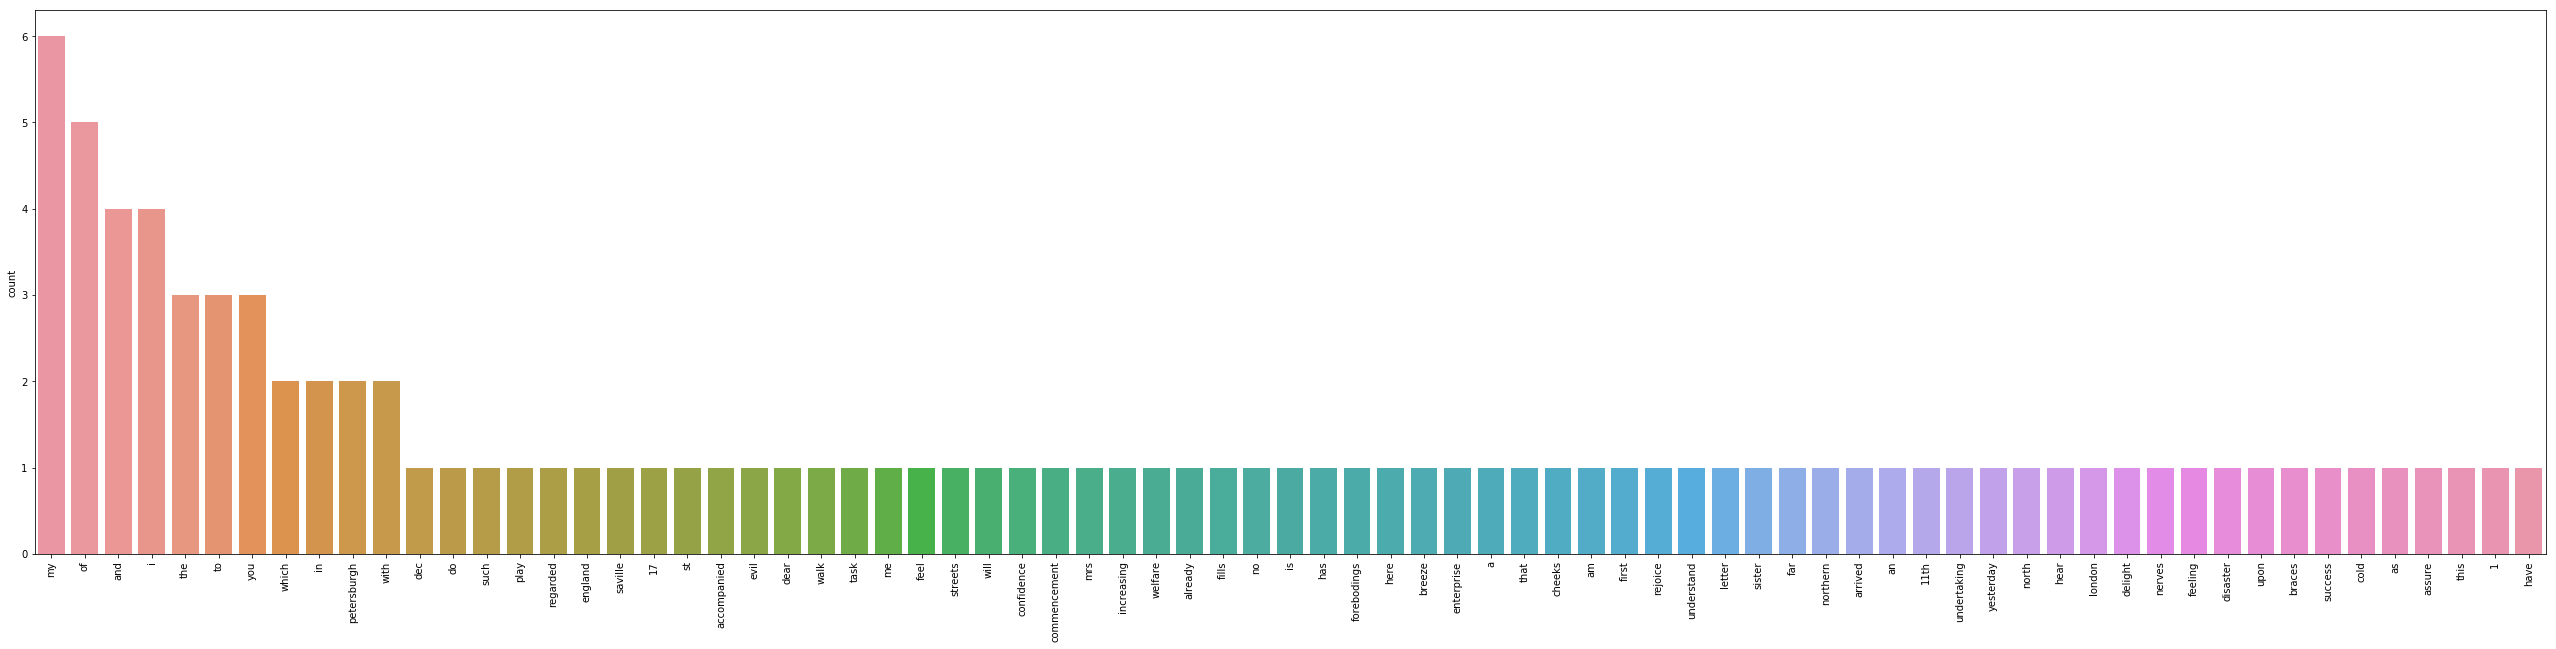

In [60]:
plt.figure(figsize=(45,10))
words = words[:100]
sns.countplot(words, order=pd.Series(words).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

#### When we removed stopwords:

In [61]:
# split sentence into words
words_nostop = list()
for word in words:
    if word not in STOP_WORDS:
        words_nostop.append(word)
# words_nostop = [word for word in words if word not in STOP_WORDS]

- More comprehensible, and unique list or words!

In [62]:
Counter(words_nostop).most_common(10)

[('petersburgh', 2),
 ('letter', 1),
 ('1', 1),
 ('mrs', 1),
 ('saville', 1),
 ('england', 1),
 ('st', 1),
 ('dec', 1),
 ('11th', 1),
 ('17', 1)]

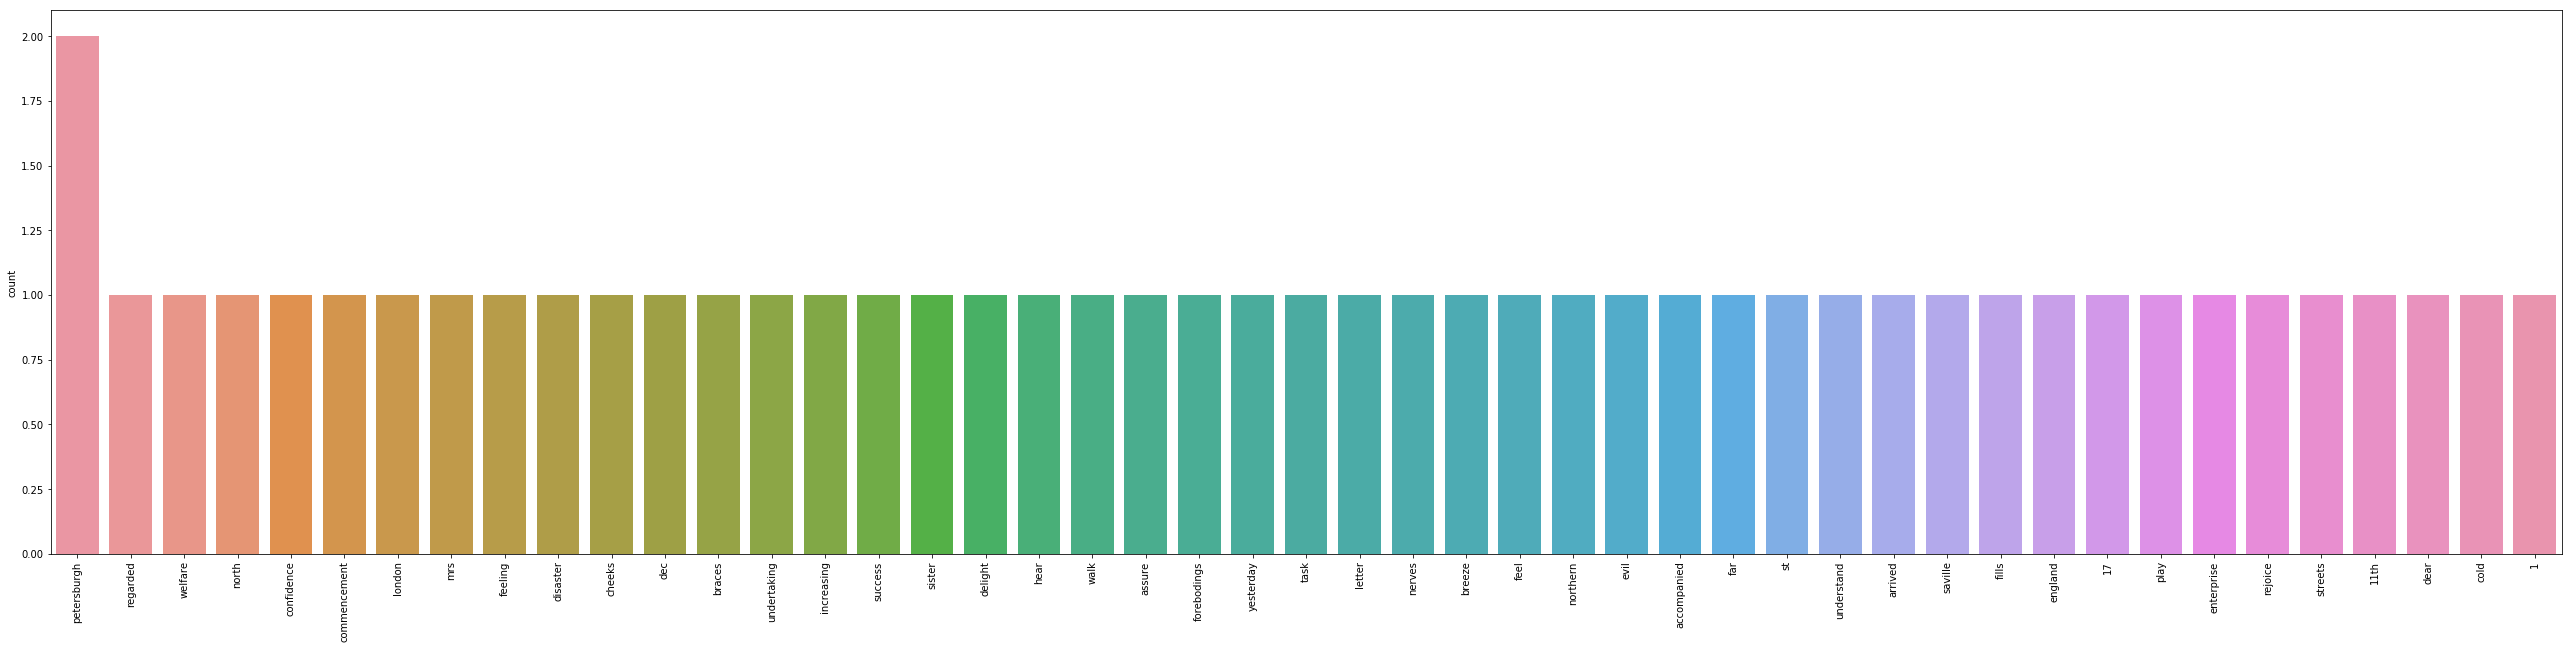

In [63]:
plt.figure(figsize=(45,10))
words_nostop = words_nostop[:100]
sns.countplot(words_nostop, order=pd.Series(words_nostop).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

### <font color='magenta'> Q3. Based on the word frequency results, what was the letter about? </font>

(type in your response here)

# 1. Extracting linguistic features from spaCy

## 1-1. Tokenize
- Token: a semantic unit for analysis
    - (Loosely) equal term for word
        - ```sent_low_pnct.split()```
    - Tricky cases
        - aren't $\rightarrow$ ?
        - O'Neil $\rightarrow$ ?
- In ```spaCy```:
    - Many token types, like word, puntuation symbol, whitespace, etc.

### Let's disect the sentence!

- initiating the ```spaCy``` object 

In [64]:
# examples partially taken from https://nlpforhackers.io/complete-guide-to-spacy/
import spacy
nlp = spacy.load('en')

- Our sentence: "Hello World!"
    - Pass the sentence string to the ```spaCy``` object ```nlp```

In [65]:
doc = nlp("Hello World!")

- The sentence is considered as a short document.

In [66]:
print(type(doc), doc)

<class 'spacy.tokens.doc.Doc'> Hello World!


- As importing the sentence string above, ```spaCy``` split the sentence into tokens (tokenization!)

In [67]:
for i,token in enumerate(doc):
    print(i, token)

0 Hello
1 World
2 !


- With index information (location from the sentence) of each token

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11|
|---|---|---|---|---|---|---|---|---|---|---|---|
| H | e | l | l | o | _ | W | o | r | l | d | ! |

In [68]:
for i, token in enumerate(doc):
    print(i, token.text, token.idx) 


0 Hello 0
1 World 6
2 ! 11


- And many more!
    - https://spacy.io/api/token#attributes

In [69]:
doc = nlp("What are you planning to do during the study break?")

print("text \t idx \t lemma \t lower \t is_punct \t is_space \t shape \t POS")
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.lower_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_
    ))


text 	 idx 	 lemma 	 lower 	 is_punct 	 is_space 	 shape 	 POS
What	0	what	what	False	False	Xxxx	NOUN
are	5	be	are	False	False	xxx	VERB
you	9	-PRON-	you	False	False	xxx	PRON
planning	13	plan	planning	False	False	xxxx	VERB
to	22	to	to	False	False	xx	PART
do	25	do	do	False	False	xx	VERB
during	28	during	during	False	False	xxxx	ADP
the	35	the	the	False	False	xxx	DET
study	39	study	study	False	False	xxxx	NOUN
break	45	break	break	False	False	xxxx	NOUN
?	50	?	?	True	False	?	PUNCT


## 1-2. Sentence detection

- For the document with multiple sentences, we would need to separate between each sentences.
- In ```spaCy```, the job is more convinient (and would cause less mistatkes) than using regular expression

### <font color='magenta'> Q4. How would you separate sentences? What's your intuition? </font>

(type in your response here)

- Our multiple sentence document: 

In [70]:
doc_multsent = """Now she had got a start, and she went on and told me all about the good
place.  She said all a body would have to do there was to go around all
day long with a harp and sing, forever and ever.  So I didn't think
much of it. But I never said so.  I asked her if she reckoned Tom Sawyer
would go there, and she said not by a considerable sight.  I was glad
about that, because I wanted him and me to be together."""

- using regular expressions...

In [71]:
import re
sentences = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", doc_multsent) # how would I remember this pattern without Google/StackOverflow?
for i, sent in enumerate(sentences):
    print(i, sent)

0 Now she had got a start, and she went on and told me all about the good
place.
1  She said all a body would have to do there was to go around all
day long with a harp and sing, forever and ever.
2  So I didn't think
much of it.
3 But I never said so.
4  I asked her if she reckoned Tom Sawyer
would go there, and she said not by a considerable sight.
5  I was glad
about that, because I wanted him and me to be together.


- in ```spaCy```!

In [72]:
# same document, but initiate as the spaCy object...
doc = nlp(doc_multsent)

- Sentences are stored as a generator object
    - Instead of storing sentences as a list, each sentence is stored as a item in the generator object 
    - Iteratable (i.e., can be used in a for loop)
    - More efficient memory use
    - https://wiki.python.org/moin/Generators

In [73]:
doc.sents

- Printing sentences with the index number

In [74]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 Now she had got a start, and she went on and told me all about the good
place.  
1 She said all a body would have to do there was to go around all
day long with a harp and sing, forever and ever.  
2 So I didn't think
much of it.
3 But I never said so.  
4 I asked her if she reckoned Tom Sawyer
would go there, and she said not by a considerable sight.  
5 I was glad
about that, because I wanted him and me to be together.


### <font color='magenta'> Q5. Separate sentences in the letter from Frankenstein, and print sentences with the index number. </font>
(remember, the letter is in the variable ```some_text```)

In [75]:
# put your code here

## 1-3. POS tagging

- I want to find words with particular part-of-speech!
- Different part-of-speech words carry different information
    - e.g., noun (subject), verb (action term), adjective (quality of the object) 
- https://spacy.io/api/annotation#pos-tagging

- Yelp review!

In [76]:
# from https://www.yelp.com/biz/ajishin-novi?hrid=juA4Zn2TX7845vNFn4syBQ&utm_campaign=www_review_share_popup&utm_medium=copy_link&utm_source=(direct)
doc = nlp("""One of the best Japanese restaurants in Novi. Simple food, great taste, amazingly price. I visit this place a least twice month.""")

###  What can you infer from this review? 
- What type of the restaurant?
- Location?
- What did the reviewer liked about?
- How often did the person visit the place?
- Any other information?

- multiple sentences exist in a document

In [77]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 One of the best Japanese restaurants in Novi.
1 Simple food, great taste, amazingly price.
2 I visit this place a least twice month.


- Question: which words are adjectives (ADJ)?

In [78]:
for i, sent in enumerate(doc.sents):
    print("__sentence__:", i)
    print("_token_ \t _POS_")
    for token in sent:
        print(token.text, "\t", token.pos_)

__sentence__: 0
_token_ 	 _POS_
One 	 NUM
of 	 ADP
the 	 DET
best 	 ADJ
Japanese 	 ADJ
restaurants 	 NOUN
in 	 ADP
Novi 	 PROPN
. 	 PUNCT
__sentence__: 1
_token_ 	 _POS_
Simple 	 ADJ
food 	 NOUN
, 	 PUNCT
great 	 ADJ
taste 	 NOUN
, 	 PUNCT
amazingly 	 ADV
price 	 NOUN
. 	 PUNCT
__sentence__: 2
_token_ 	 _POS_
I 	 PRON
visit 	 VERB
this 	 DET
place 	 NOUN
a 	 DET
least 	 ADJ
twice 	 ADJ
month 	 NOUN
. 	 PUNCT


- And dependency relationships also can be extracted as strings

In [79]:
for token in doc:
    print('"' + token.text + '", ', token.pos_, list(token.ancestors), (token.dep_))

"One",  NUM [] ROOT
"of",  ADP [One] prep
"the",  DET [restaurants, of, One] det
"best",  ADJ [restaurants, of, One] amod
"Japanese",  ADJ [restaurants, of, One] amod
"restaurants",  NOUN [of, One] pobj
"in",  ADP [restaurants, of, One] prep
"Novi",  PROPN [in, restaurants, of, One] pobj
".",  PUNCT [One] punct
"Simple",  ADJ [food] amod
"food",  NOUN [] ROOT
",",  PUNCT [food] punct
"great",  ADJ [taste, food] amod
"taste",  NOUN [food] conj
",",  PUNCT [taste, food] punct
"amazingly",  ADV [price, taste, food] compound
"price",  NOUN [taste, food] appos
".",  PUNCT [food] punct
"I",  PRON [visit] nsubj
"visit",  VERB [] ROOT
"this",  DET [place, visit] det
"place",  NOUN [visit] dobj
"a",  DET [month, visit] det
"least",  ADJ [twice, month, visit] amod
"twice",  ADJ [month, visit] nummod
"month",  NOUN [visit] npadvmod
".",  PUNCT [visit] punct


```spaCy``` follows the ```ClearNLP``` annotations for dependency parsing
- https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md

# 2. Word embedding

- So far, we seen how we can extract some interesting syntactic characteristics from text from using ```spacy```
- It extracted the characteristics, but did not indicate what it means
- Can machines understand semantic relationship between words?

- Distributional semantics
    - Representing semantic information of words in a geometric semantic space
        - Different relationship between words: explained by geometric relationship between words 
        - e.g., Related words are located closer to each other; 
    - And it's often called as *word embedding*

#### Word2Vec
- Developed by [Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Represent the meaning of the words as a vector
    - Vector: numeric array
    - Output of a neural network model that predicts the next word
- Surprisingly, many different semantic informations can be represented from word vectors of ```Word2Vec```
- (More explanation in here: https://www.tensorflow.org/tutorials/representation/word2vec)

<img src="https://www.tensorflow.org/images/softmax-nplm.png" width="400">

![](https://www.tensorflow.org/images/linear-relationships.png)

### Let's try with some example: words in a semantic space
$\rightarrow$ https://projector.tensorflow.org

### <font color='red'> Q6. Any interesting findings from TensorFlow Projector page? </font>

(type in your response here)

# WE MIGHT RUN OUT OF TIME, SO THIS IS AN APPROPRIATE PLACE TO STOP

## OK. Let's try some more details in our local machines!
- Download the [pretrained model](https://drive.google.com/open?id=10GXpuviDJVa-k8ZmiYX3BVABNDRaA6tg)
- We are using [gensim](https://radimrehurek.com/gensim/) package this time

In [80]:
! conda install -y gensim

Solving environment: done

# All requested packages already installed.



In [81]:
import gensim

In [83]:
# The following assumes you have downloaded the appropriate model
# from https://github.com/eyaler/word2vec-slim
# and you can load it with the following command:
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("~/Downloads/GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)

## 2-1. Calculating similarity between words

- Q: What's similarity between *school* and *student*?

- the word vector for *school* looks like this:

In [84]:
w2v_mod['school']

array([ 3.70471478e-02,  1.14410305e-02,  1.49575379e-02,  8.87546614e-02,
        3.96226160e-02, -2.67452672e-02,  6.33961856e-02, -1.90188568e-02,
       -1.89445645e-03, -3.68490331e-02,  1.01037674e-01,  1.85235739e-02,
        2.69433800e-02, -4.00188453e-02, -4.29905392e-02,  4.31886539e-02,
       -8.12263638e-02,  5.72051527e-03,  5.54716662e-02, -3.56603563e-02,
        8.32074955e-02,  6.93395808e-02,  4.72994987e-03,  6.97358102e-02,
        1.96874887e-03, -1.41848966e-01,  9.22464067e-04,  7.48867467e-02,
        4.85377051e-02, -1.02028241e-02,  4.14056368e-02, -4.33867648e-02,
        1.62452739e-02,  3.04598873e-03, -6.61697686e-02, -6.06226064e-02,
        9.27169248e-02, -2.04056483e-02,  1.88207440e-02,  5.07169515e-02,
        5.29952534e-03,  5.19056283e-02,  4.47735563e-02, -2.05047056e-02,
        1.39669729e-02,  5.86414747e-02,  6.97358102e-02, -1.12924464e-02,
       -4.49716710e-02,  9.31131542e-02, -4.75471430e-02, -4.95282710e-02,
       -1.44251098e-03, -

In [85]:
len(w2v_mod['school'])

300

- and the word vector for *student* looks like this:

In [86]:
w2v_mod['student']

array([ 0.01336551,  0.00730235,  0.08037006,  0.05629445,  0.06479172,
        0.01141821,  0.11400511, -0.01221483,  0.0559404 , -0.1359564 ,
        0.01849928, -0.04779717, -0.04337151, -0.05027555, -0.0073466 ,
        0.00477972, -0.02442967, -0.02389859, -0.00907261, -0.05098365,
        0.00783343,  0.06302146, -0.00064449, -0.03328099, -0.03540531,
       -0.17844278, -0.04956744, -0.002069  ,  0.06160524,  0.0366445 ,
        0.03416613, -0.03983098, -0.03080262,  0.01964995, -0.02372156,
       -0.00610742,  0.04071611,  0.0506296 , -0.03009452,  0.08072411,
       -0.08638897,  0.0426634 , -0.01672901,  0.03115668,  0.0619593 ,
       -0.02496075,  0.01451618, -0.03752963,  0.05771066,  0.0179682 ,
       -0.03947692, -0.05452418,  0.0054657 , -0.01964995,  0.0906376 ,
       -0.03452018, -0.04284043,  0.04036206,  0.07435116, -0.03629045,
        0.00610742, -0.03452018, -0.00111748, -0.00489036,  0.03363505,
       -0.0306256 ,  0.03080262, -0.02009252,  0.05735661,  0.03

- the similarity between two word vectors is:

In [87]:
w2v_mod.similarity('school', 'student')

0.605562749213432

### Methods for measuring similarity

<table>
<tr>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_76-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-37.jpg" width="400"></td>
</tr>
</table>

In [88]:
# (image from http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

![](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)

- Cosine simiarity can go from -1 to 1
- But usually, we deal with 0 to 1 scores for comparing words in ```Word2Vec```

### Example: What's the cosine similarity between *school* and *tiger*? </font>
- How would you interprete the results?

(type in your response here)

In [62]:
# put your code here

In [63]:
w2v_mod.similarity('school', 'tiger')

0.08660267014184596

### Just for fun...
Try some other words. Any other interesting findings? How would you interprete the results?

In [64]:
# put your code here

In [65]:
w2v_mod.similarity('queen', 'king')

0.6510956833222199

In [66]:
w2v_mod.similarity('cat', 'dog')

0.7609457072663728

In [67]:
w2v_mod.similarity('Python', 'Java')

0.4618970990005372

(type in your response here)

## 2-2. Analogy from word vectors

<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $woman - man + king \approx ?$
- How this works?
    - $woman:man \approx x:king $
    - $\rightarrow woman - man \approx x - king $
    - $\rightarrow woman - man + king \approx x$
    - List top-10 words ($x$) that can solve the equation!

In [68]:
w2v_mod.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114)]

- $Spain - Germany + Berlin \approx ?$
    - $\rightarrow Spain - Germany \approx x -  Berlin $

In [69]:
w2v_mod.most_similar(positive=['Spain', 'Berlin'], negative=['Germany'])

[('Madrid', 0.717348039150238),
 ('Barcelona', 0.5742595791816711),
 ('Malaga', 0.5547429323196411),
 ('Bilbao', 0.5404423475265503),
 ('Lisbon', 0.5366039276123047),
 ('Seville', 0.5312415361404419),
 ('Paris', 0.5251091718673706),
 ('Catalan', 0.5213973522186279),
 ('Rome', 0.5174577832221985),
 ('Bogota', 0.5146557688713074)]

### Just for fun: Any other interesting examples? How would you interprete the results?

In [89]:
# put your code here